# Home Assignment No. 2 - part one

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [2]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Task 1. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 1.1. Data preprocessing and feauture importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**1.1.1) load the dataset**

In [4]:
### BEGIN Solution (do not delete this comment)

filename = 'data_fs.csv'
data = pd.read_csv(filename)

### END Solution (do not delete this comment)

**1.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [5]:
### BEGIN Solution (do not delete this comment)

data.drop(['timestamp'], axis='columns', inplace=True)
data = data.fillna(0)

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
  pd.get_dummies(data[col])

data.drop(categorical_cols, axis='columns', inplace=True)

### END Solution (do not delete this comment)

**1.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [6]:
### BEGIN Solution (do not delete this comment)

x, y = data.loc[:, data.columns != 'price_doc'], data['price_doc']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

### END Solution (do not delete this comment)


**1.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

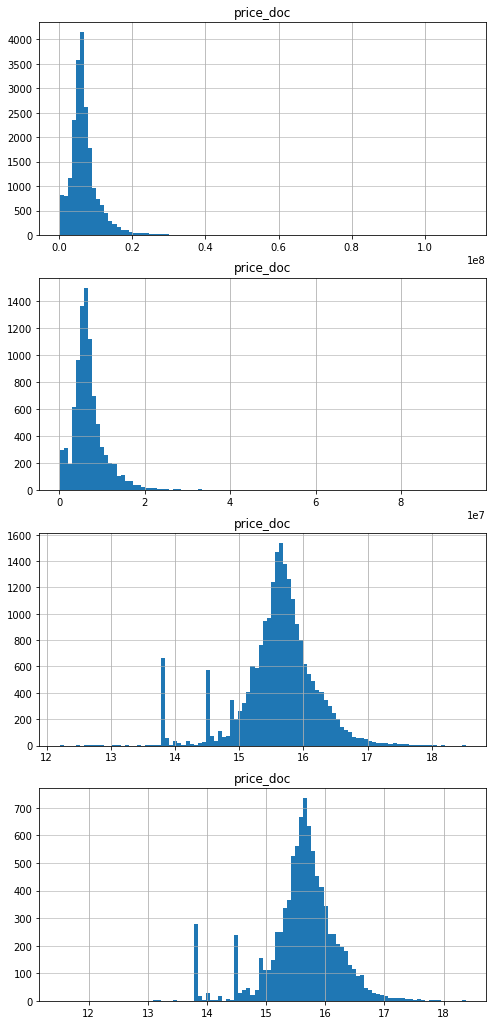

In [7]:
### BEGIN Solution (do not delete this comment)

fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(8,18))

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_values = [y_train, y_test, y_train_log, y_test_log]

for y_val, ax in zip(y_values, axes.flat):
    n, bins, patches = ax.hist(x=y_val, bins=100)
    ax.grid(axis='y', alpha=0.75)
    ax.grid(True)
    ax.set_title(y_val.name)
plt.show() 

### END Solution (do not delete this comment)

**1.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [8]:
### BEGIN Solution (do not delete this comment)

print(x_train.shape, x_test.shape)
 
### END Solution (do not delete this comment)

(21329, 370) (9142, 370)


**Your text answer (do not delete this comment)**:

I do not think that all of these features are relevant for the adequate price prediction because not all of the features can have significant effect on the model which is used to predict certain variable. There are too many of them, and we need to choose best ones in order to achive better perfomance for our model.

**1.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

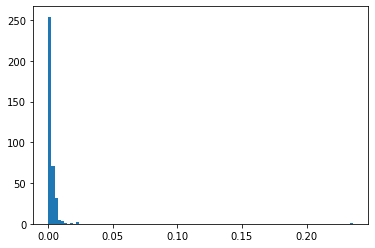

In [9]:
### BEGIN Solution (do not delete this comment)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import average_precision_score

clf = RandomForestRegressor(random_state=5, n_jobs=-1)

clf.fit(x_train, y_train_log)

feat_import = pd.Series(clf.feature_importances_, index=x_train.columns)

plt.hist(x=feat_import.sort_values(), bins=100)
plt.grid(False)

### END Solution (do not delete this comment)

**1.1.7) print the names of the 20 most important features**

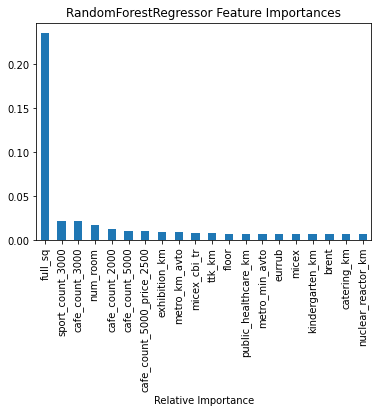

<Figure size 720x504 with 0 Axes>

full_sq                       0.235834
sport_count_3000              0.021764
cafe_count_3000               0.021472
num_room                      0.017394
cafe_count_2000               0.012078
cafe_count_5000               0.010592
cafe_count_5000_price_2500    0.010316
exhibition_km                 0.009595
metro_km_avto                 0.008768
micex_cbi_tr                  0.008135
ttk_km                        0.007618
floor                         0.007137
public_healthcare_km          0.007125
metro_min_avto                0.006974
eurrub                        0.006885
micex                         0.006872
kindergarten_km               0.006709
brent                         0.006576
catering_km                   0.006523
nuclear_reactor_km            0.006497
dtype: float64


In [10]:
### BEGIN Solution (do not delete this comment)

top20 = feat_import.sort_values(ascending=False).head(20)
top20.plot(kind='bar')

plt.title(f'{type(clf).__name__} Feature Importances')
plt.xlabel("Relative Importance")
plt.figure(figsize=(10,7))
plt.show()
print(top20)

### END Solution (do not delete this comment)

<br>

### Subproblem 1.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets. 

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. on input takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**1.2.1) Implement the function described above**

In [11]:
### BEGIN Solution (do not delete this comment)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_log_error 

dectree_clf = DecisionTreeRegressor(random_state=5)
linreg_clf = LinearRegression(n_jobs=-1)
ridgereg_clf = Ridge()
ranfor_clf = RandomForestRegressor(n_jobs=1, random_state=5)
lasso_clf = Lasso(random_state=5)

classifiers = [dectree_clf, linreg_clf, ridgereg_clf, ranfor_clf, lasso_clf]
df = pd.DataFrame(columns=('Train Error', 'Test Error'))

def comparison_function(clfs, train_data, test_data):
    X_train, y_train = train_data
    X_test, y_test = test_data

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_train)
    train_error = mean_squared_log_error(y_train, y_pred)

    y_pred = clf.predict(X_test)
    test_error = mean_squared_log_error(y_test, y_pred)

    return train_error, test_error


for clf in classifiers:
    train_error, test_error = comparison_function(clf, (x_train, y_train_log), (x_test, y_test_log))
    values_to_add = {'Train Error': train_error, 'Test Error': test_error}
    row_to_add = pd.Series(values_to_add, name=type(clf).__name__)
    df = df.append(row_to_add)
 
print(df)

### END Solution (do not delete this comment)

                        Train Error  Test Error
DecisionTreeRegressor  2.560424e-10    0.001635
LinearRegression       9.327773e-04    0.000959
Ridge                  9.334692e-04    0.000959
RandomForestRegressor  1.266092e-04    0.000848
Lasso                  1.076569e-03    0.001072


**1.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [12]:
### BEGIN Solution

classifiers = [dectree_clf, linreg_clf, ridgereg_clf, ranfor_clf, lasso_clf]
df = pd.DataFrame(columns=('Train Error', 'Test Error'))
top20_list = top20.index.tolist()

for clf in classifiers:
    train_error, test_error = comparison_function(clf, (x_train[top20_list], y_train_log), (x_test[top20_list], y_test_log))
    values_to_add = {'Train Error': train_error, 'Test Error': test_error}
    row_to_add = pd.Series(values_to_add, name=type(clf).__name__)
    df = df.append(row_to_add)
 
print(df)

### END Solution

                        Train Error  Test Error
DecisionTreeRegressor  8.984404e-10    0.001643
LinearRegression       1.045916e-03    0.001022
Ridge                  1.045915e-03    0.001022
RandomForestRegressor  1.264979e-04    0.000840
Lasso                  1.220452e-03    0.001204


<br>

### Subproblem 1.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find feature importances by applying the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

The decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks, 1.3.1 - 1.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**1.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure the model's "quality".** 

In [67]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution

    for feature in X.columns:
      if feature not in list(used_features):
        update_for_search = used_features + [feature]
        scores[feature] = cross_val_score(model, X.loc[:, update_for_search], y, cv=cv,
            n_jobs=-1, scoring='neg_root_mean_squared_error').mean()

    ### END Solution

    return scores

**1.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in subtask 1 above) that would**

**- compute the model's "quality" over the currently *unused* features**

**- find the feature, which has given the best score and add it to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feature to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [62]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution

    current_round = 0
    highest_quality = -np.inf
    
    used_features, unused_features = [], X.columns.tolist()

    while current_round < n_rounds:
        current_round += 1

        if len(unused_features) == 0:
            break

        scores = selection_step(model, X, y, used_features, cv=3)

        new_feature = max(scores, key=scores.get)   
        new_quality = scores[new_feature]
        
        used_features.append(new_feature)
        unused_features.remove(new_feature)

        if new_quality > highest_quality:
            feat_best_list.append(new_feature)
            highest_quality = new_quality
            print(f"Best score = {highest_quality}")
            print(f'Best feature list: {feat_best_list}')
            print()
            current_round = 0

    ### END Solution
    
    return feat_best_list


**1.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [63]:
### BEGIN Solution

best_features = forward_steps(x_train, y_train_log, n_rounds=2, model=DecisionTreeRegressor(random_state=5))

### END Solution

Best score = -0.5601098103962895
Best feature list: ['16_29_all']

Best score = -0.535756393383274
Best feature list: ['16_29_all', 'num_room']

Best score = -0.5345098509819489
Best feature list: ['16_29_all', 'num_room', '16_29_female']

Best score = -0.5342548266687915
Best feature list: ['16_29_all', 'num_room', '16_29_female', 'cafe_count_500_price_high']

Best score = -0.5337602462238822
Best feature list: ['16_29_all', 'num_room', '16_29_female', 'cafe_count_500_price_high', 'office_raion']

Best score = -0.5333673345934993
Best feature list: ['16_29_all', 'num_room', '16_29_female', 'cafe_count_500_price_high', 'office_raion', 'additional_education_raion']

Best score = -0.533046544466585
Best feature list: ['16_29_all', 'num_room', '16_29_female', 'cafe_count_500_price_high', 'office_raion', 'additional_education_raion', 'shopping_centers_raion']

Best score = -0.5329763387706375
Best feature list: ['16_29_all', 'num_room', '16_29_female', 'cafe_count_500_price_high', 'office_

**1.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE scores using these features. Remember the function you wrote earlier.**

In [77]:
### BEGIN Solution

classifiers = [dectree_clf, linreg_clf, ridgereg_clf, ranfor_clf, lasso_clf]
df = pd.DataFrame(columns=('Train Error', 'Test Error'))

for clf in classifiers:
    train_error, test_error = comparison_function(clf, (x_train[best_features], y_train_log), (x_test[best_features], y_test_log))
    values_to_add = {'Train Error': train_error, 'Test Error': test_error}
    row_to_add = pd.Series(values_to_add, name=type(clf).__name__)
    df = df.append(row_to_add)
 
print(df)

### END Solution

                       Train Error  Test Error
DecisionTreeRegressor     0.000964    0.001056
LinearRegression          0.001216    0.001208
Ridge                     0.001216    0.001208
RandomForestRegressor     0.000966    0.001046
Lasso                     0.001358    0.001366


<br>

## Task 2. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [78]:
data = pd.read_csv('glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
24,1.51720,13.38,3.50,1.15,72.85,0.5,8.43,0.00,0.00,1
208,1.51640,14.37,0.00,2.74,72.85,0.0,9.45,0.54,0.00,7
150,1.51665,13.14,3.45,1.76,72.48,0.6,8.38,0.00,0.17,3


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform a 5-fold cross-validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [79]:
### BEGIN Solution (do not delete this comment)

import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

clfs = [
        DecisionTreeClassifier(random_state = 5, max_depth=7),
        RandomForestClassifier(n_estimators=100, max_depth=3),
        KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
        LogisticRegression(random_state=5)
]

scorings = [None, 'accuracy',
 'balanced_accuracy',
 'f1_macro',
 'f1_micro',
 'f1_weighted',
 'mutual_info_score',
 'neg_mean_absolute_error',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_root_mean_squared_error',
 'precision_macro',
 'precision_micro',
 'rand_score',
 'recall_macro',
 'recall_micro',
 'recall_weighted',
 ]


for scoring in scorings:
    print('________________________________________________________')
    perfomances = []
    times = []

    header = pd.MultiIndex.from_product([['MultiClass Labeling','OneVSRest', 'OneVSOne'],
                                        ['score', 'time']],
                                        names=['appr.','perf.'])
    data = []

    for clf in clfs:
        new_row = []
        
        start = time.time()
        score = cross_val_score(clf,X,y, cv = 5, scoring=scoring).mean()
        end = time.time()
        t = end-start
        
        new_row.append(score)
        new_row.append(t)
        
        start = time.time()
        new_clf = OneVsRestClassifier(clf)
        score = cross_val_score(new_clf,X,y, cv = 5, scoring=scoring).mean()
        end = time.time()
        t = end-start
        
        new_row.append(score)
        new_row.append(t)
        
        start = time.time()
        new_clf = OneVsOneClassifier(clf)
        score = cross_val_score(new_clf,X,y, cv = 5, scoring=scoring).mean()
        end = time.time()
        t = end-start
        
        new_row.append(score)
        new_row.append(t)

        data.append(new_row)

    print(f'With scoring {scoring}')
    df = pd.DataFrame(data,
                    index=[type(clf).__name__ for clf in clfs], 
                    columns=header)

    print(df)
    print('________________________________________________________')

### END Solution (do not delete this comment)

________________________________________________________
With scoring None
appr.                  MultiClass Labeling           OneVSRest            \
perf.                                score      time     score      time   
DecisionTreeClassifier            0.579402  0.026289  0.551495  0.130005   
RandomForestClassifier            0.612292  0.858010  0.617054  4.872781   
KNeighborsClassifier              0.612625  0.935357  0.621927  0.380686   
LogisticRegression                0.584164  0.178937  0.556257  0.742101   

appr.                   OneVSOne             
perf.                      score       time  
DecisionTreeClassifier  0.588926   0.120473  
RandomForestClassifier  0.621816  11.918030  
KNeighborsClassifier    0.621927   1.465129  
LogisticRegression      0.570543   1.594370  
________________________________________________________
________________________________________________________
With scoring accuracy
appr.                  MultiClass Labeling           One

**Which metric did you choose to optimize during cross validation and why? Explain**

**Your text answer (do not delete this comment)**:



I have decided to experiment with all metrics from **sorted(sklearn.metrics.SCORERS.keys())** and look at their perfomance. Most of the metrics do not show better results in scores compared with default scoring. I chose to use *accuracy, balanced_accuracy, f1_macro, f1_micro, f1_weighted, mutual_info_score, neg_mean_absolute_error, neg_mean_poisson_deviance, neg_mean_squared_error, neg_root_mean_squared_error, precision_macro, precision_micro, rand_score, recall_macro, recall_micro, recall_weighted* scorings to optmize the results suring cross validation. In my opinion, balanced accuracy can be used for optimization due to its ability to work with imbalanced data. F1 metrics can help us 

**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?**

**Your text answer (do not delete this comment)**:

DecisionTreeClassifier, because it (for example, with scoring='balanced accuracy') provides significantly better perfomance without a significant increase in computation time.

# Task 3. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions on the $ n $ -th fold are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be retrained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on the test set for each of the models.
* Train the metaclassifier (in this case, once again, it is just an ML model) on the original dataset's features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Report the training score of the meta-classifier on the $ n $-th fold. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain a better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More details about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [97]:
from sklearn import datasets
fc = sklearn.datasets.fetch_covtype()

Write meta classifier function.

In [89]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    import scipy
    
    predictions = []

    for clf in base_clfs:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        predictions.append(pred)
    
    final_prediction = np.array([])
    for i in range(0,len(x_test)):
        final_prediction = np.append(final_prediction, scipy.stats.mode([p for p in predictions]))

    print(final_prediction)
    ### END Solution (do not delete this comment)
    pass

### Subproblem 3.1 (1 point)

**3.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [91]:
### BEGIN Solution (do not delete this comment)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

base_clfs = [
        DecisionTreeClassifier(random_state = 5),      
        DecisionTreeClassifier(random_state = 5, max_depth=5),
        DecisionTreeClassifier(random_state = 5, max_depth=10),
        RandomForestClassifier(n_estimators=10, max_depth=3, n_jobs=-1),
        RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1),
        RandomForestClassifier(n_estimators=30, max_depth=5, n_jobs=-1),
]

X_train, X_test, y_train, y_test = train_test_split(fc.data, fc.target, test_size=0.4, random_state=5)

for clf in base_clfs:
    clf.fit(X_train, y_train)        

### END Solution (do not delete this comment)

**3.1.2) Report individual scores on test set. As a score use accuracy.**

In [92]:
### BEGIN Solution (do not delete this comment)

scores = {}
names = ['DecTree', 'DecTree_depth5', 'DecTree_depth_10', 'RandForest_depth3_est10', 'RandForest_depth5_est10', 'RandForest_depth5_est30']
for clf, name in zip(base_clfs, names):
    y_pred = clf.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)
    print(f'{name}: {accuracy_score(y_test, y_pred)}')

### END Solution (do not delete this comment)

DecTree: 0.9297347303199157
DecTree_depth5: 0.7023730126288161
DecTree_depth_10: 0.7771347432284159
RandForest_depth3_est10: 0.6134334459241411
RandForest_depth5_est10: 0.6787504571760504
RandForest_depth5_est30: 0.6830661990921022


### Subproblem 3.2 (1 point)

**3.2.1) Train metaclassifier (in this case, once again, it is just an ML model) on original dataset's features. And report score on test.**

In [96]:
### BEGIN Solution (do not delete this comment)

meta_clf = DecisionTreeClassifier()
meta_clf.fit(X_train, y_train)
score = accuracy_score(y_test, meta_clf.predict(X_test))
print(f'Metaclassifier score on original dataset features: {score}')

### END Solution (do not delete this comment)

Metaclassifier score on original dataset features: 0.9295411028162045


**3.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Report the training score of the meta-classifier on the $ n $-th fold. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [ ]:
### BEGIN Solution (do not delete this comment)

meta_classifier(base_clfs=base_clfs, final_classifier=meta_clf, X_train=X_train, X_test=X_test, y_train=y_train, cv=5)

### END Solution (do not delete this comment)

**3.2.3) Report score(accuracy) on test.**

In [ ]:
### BEGIN Solution (do not delete this comment)

### END Solution (do not delete this comment)

**3.2.4) Does stacking helped to gain a better score?**

**Your text answer (do not delete this comment)**:

\<write your answer\>